<a href="https://colab.research.google.com/github/rajatc2/Machine-Learning/blob/main/Penguin-Species-Prediction/Penguin_Species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Load and Visualization

In [1]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
#styling preferences for sns
sns.set_style('whitegrid')
sns.set_context('poster')
#drive.mount('/content/gdrive/')
#datadir = "/content/gdrive/MyDrive/CS441/hw2/"

drive.mount('/content/drive')
datadir = "/content/drive/My Drive/CS441/hw2/"

df_penguins = pd.read_csv(datadir + 'penguins_size.csv')
df_penguins.head(10)

def get_penguin_xy(df_penguins):
  data = np.array(df_penguins[['island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']])
  y = df_penguins['species']
  ui = np.unique(data[:,0])
  us = np.unique(data[:,-1])
  X = np.zeros((len(y), 10))
  for i in range(len(y)):
    f = 0
    for j in range(len(ui)):
      if data[i, f]==ui[j]:
        X[i, f+j] = 1
    X[i, 3:7] = data[i, 1:5]
    for j in range(len(us)):
      if data[i, 5]==us[j]:
        X[i, f+j] = 1
  feature_names = ['island_biscoe', 'island_dream', 'island_torgersen', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_female', 'sex_male', 'sex_unknown']
  X = pd.DataFrame(X, columns=feature_names)
  return(X, y, feature_names, np.unique(y))


Mounted at /content/drive


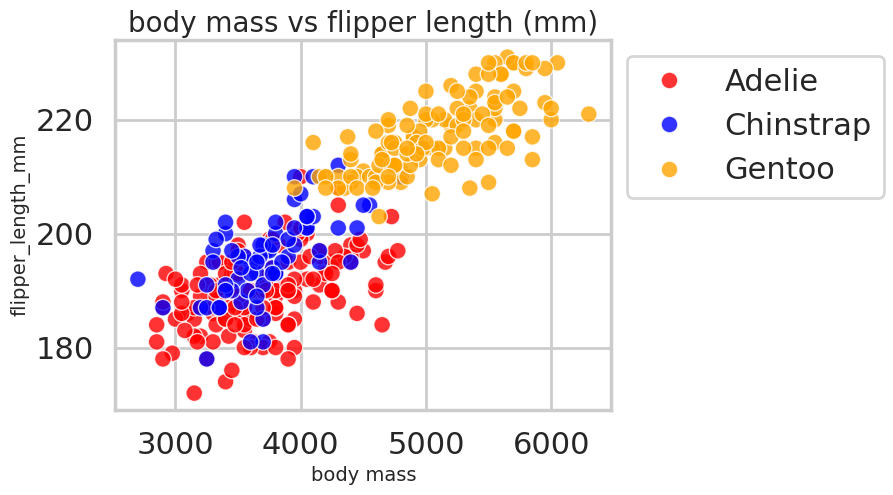

In [2]:
# create other visualizations

palette = ["red", "blue", "orange"]

# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
sns.scatterplot(data=df_penguins, x = 'body_mass_g', y = 'flipper_length_mm',
               hue = 'species', palette=palette, alpha=0.8)

plt.xlabel('body mass', fontsize=14)
plt.ylabel('flipper_length_mm', fontsize=14)
plt.title('body mass vs flipper length (mm)', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()


# 1. Feature Analysis and Simple Rules for Classification

## 1a. Feature Analysis

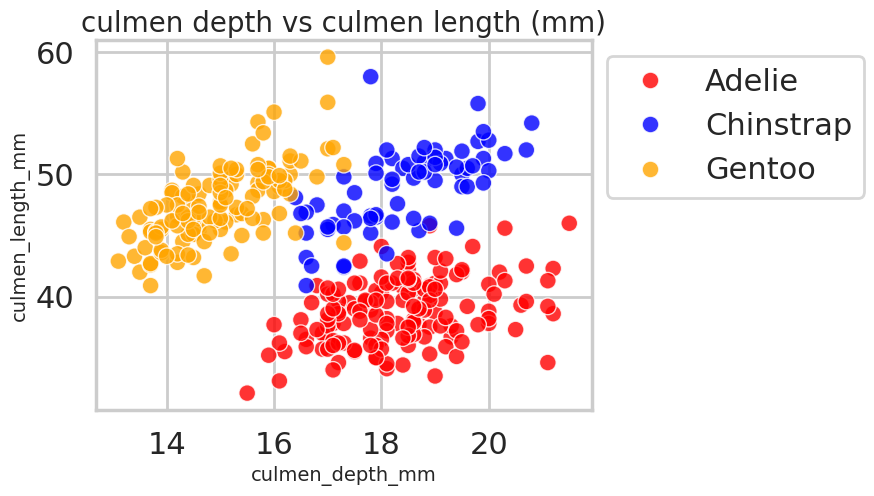

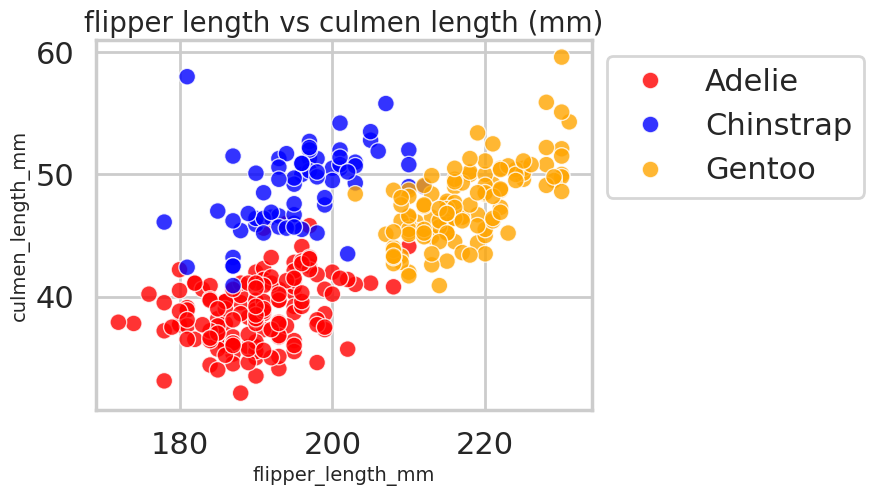

In [3]:
palette = ["red", "blue", "orange"]

# create other visualizations
sns.scatterplot(data=df_penguins, x = 'culmen_depth_mm', y = 'culmen_length_mm',
               hue = 'species', palette=palette, alpha=0.8)

plt.xlabel('culmen_depth_mm', fontsize=14)
plt.ylabel('culmen_length_mm', fontsize=14)
plt.title('culmen depth vs culmen length (mm)', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

# create other visualizations
sns.scatterplot(data=df_penguins, x = 'flipper_length_mm', y = 'culmen_length_mm',
               hue = 'species', palette=palette, alpha=0.8)

plt.xlabel('flipper_length_mm', fontsize=14)
plt.ylabel('culmen_length_mm', fontsize=14)
plt.title('flipper length vs culmen length (mm)', fontsize=20)
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()


# 1b. Rules from Tree

Rule 1

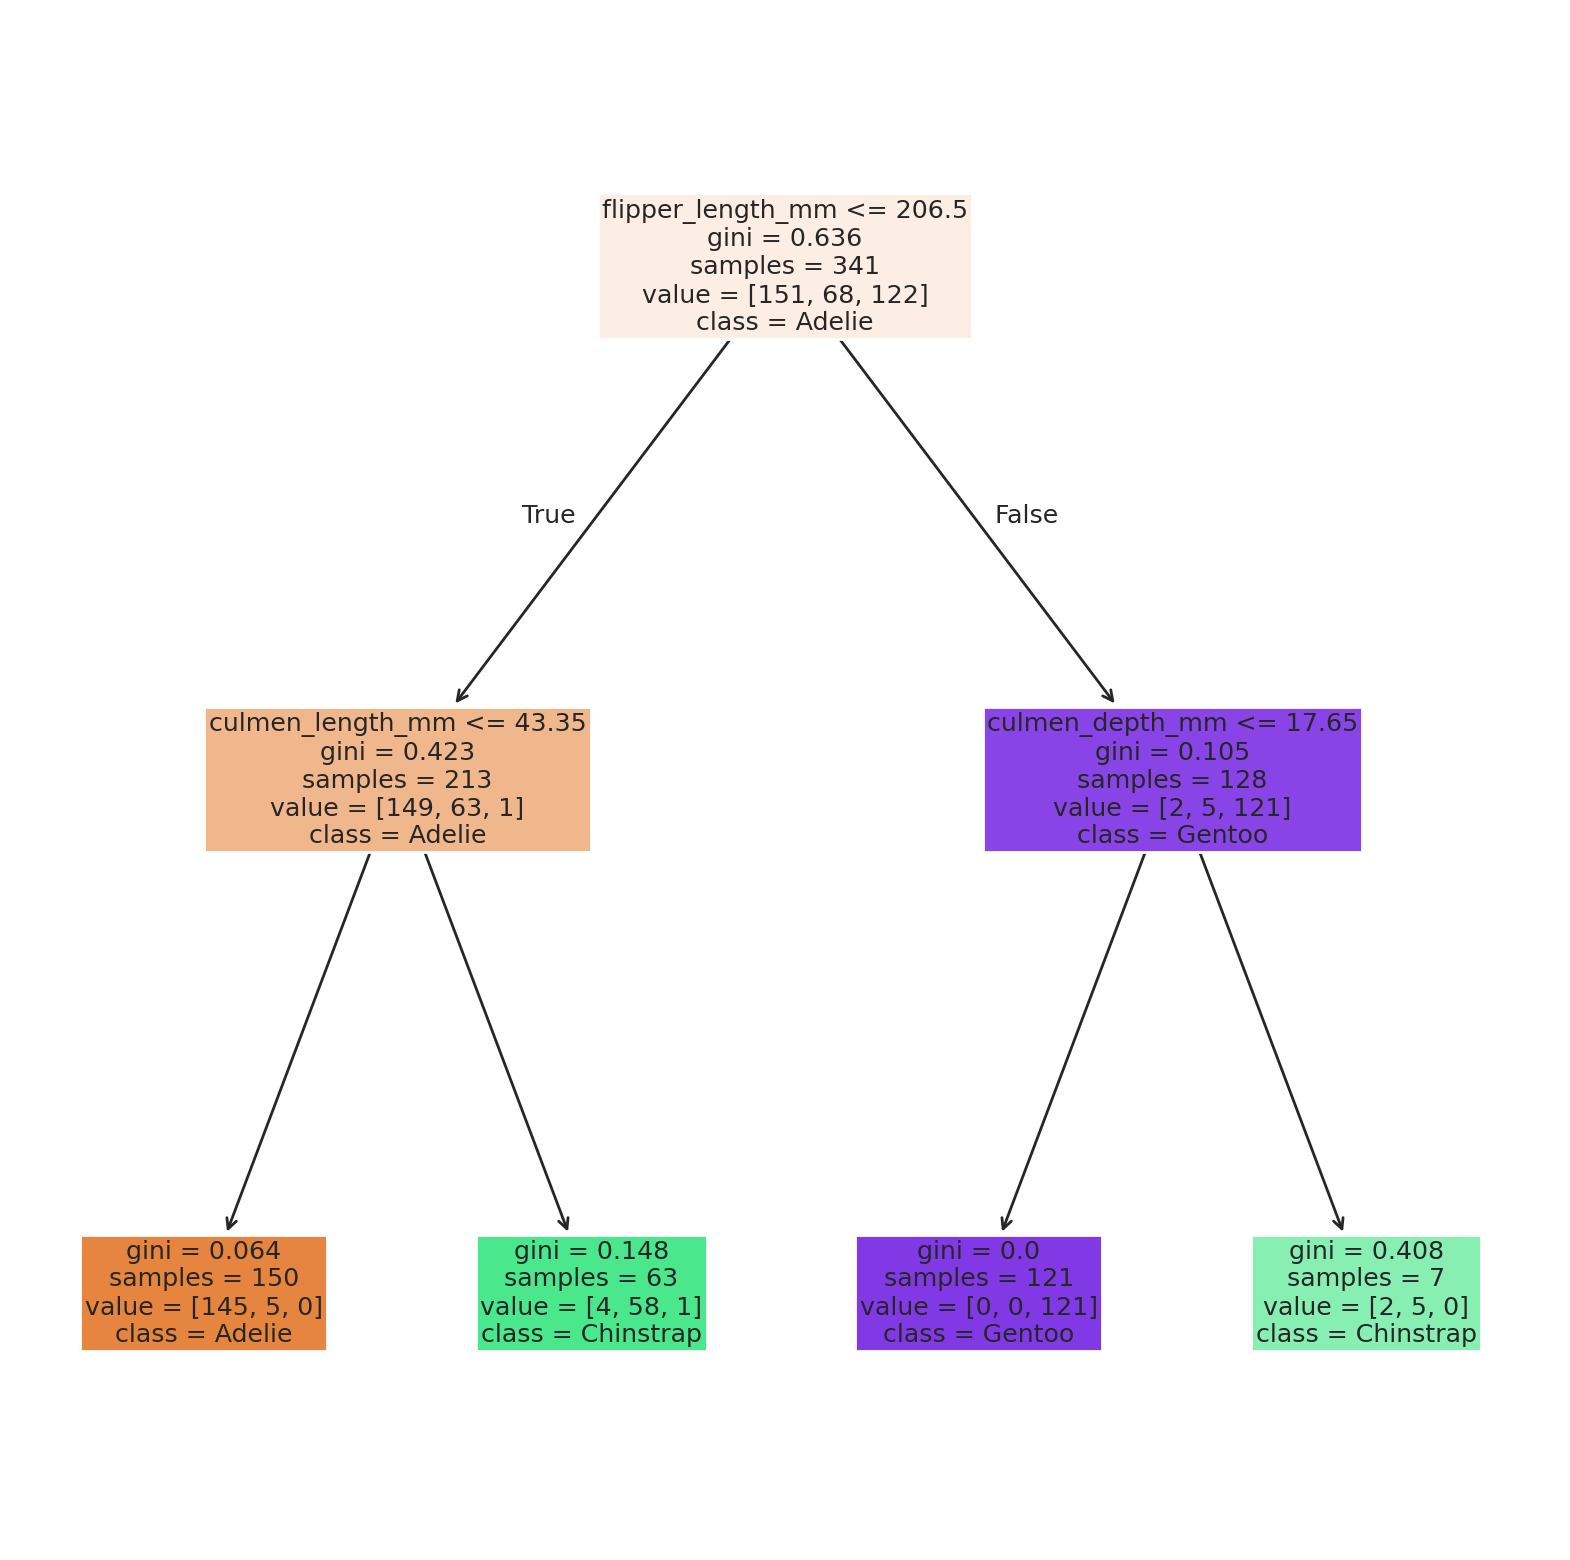

In [4]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

df = df_penguins

X = df.drop(['species','sex','island'], axis=1) #Dropping the features without values
y = df['species']

clf = DecisionTreeClassifier(criterion='gini', max_depth=2) #max_depth chosen to have two guess
clf.fit(X, y)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(clf, feature_names=X.columns, class_names=y.unique(), ax=ax, filled=True)

plt.show()


Rule 2

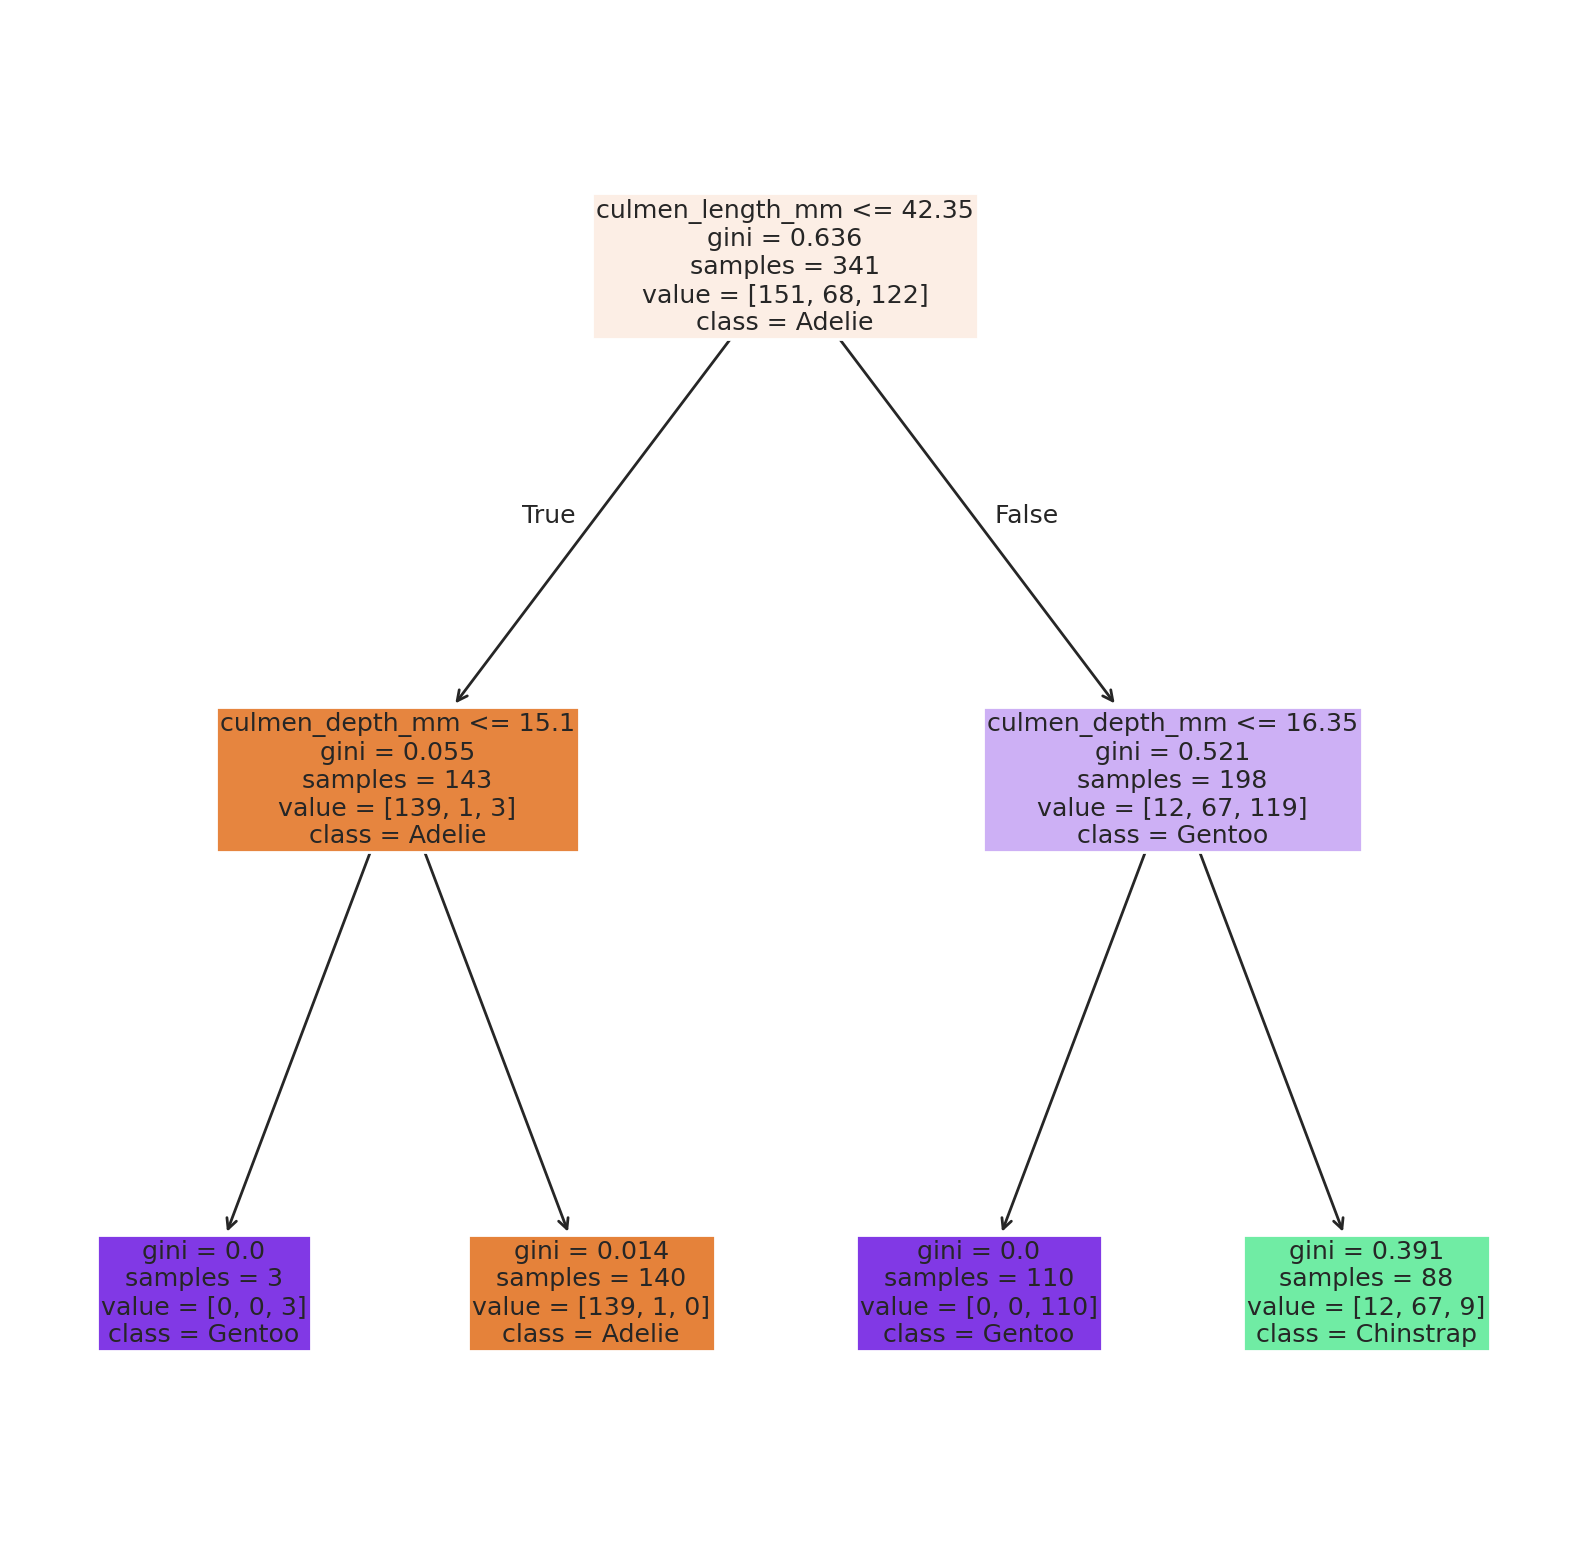

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd

df = df_penguins

X = df.drop(['species','sex','island','flipper_length_mm'], axis=1) #Dropping the features without values
y = df['species']

clf = DecisionTreeClassifier(criterion='gini', max_depth=2) #max_depth chosen to have two guess
clf.fit(X, y)

# Visualize the decision tree
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(clf, feature_names=X.columns, class_names=y.unique(), ax=ax, filled=True)

plt.show()


# 2. Species Classifier using Logistic Regression

In [7]:
# design a classification model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y, feature_names, class_names = get_penguin_xy(df_penguins)

scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

clf = LogisticRegression().fit(X, y)

acc = np.mean(cross_val_score(clf, np.array(X), np.array(y), cv=5))
print("Accuracy of the model is :", acc*100,'%')

Accuracy of the model is : 99.41176470588235 %
